# Predicting Stroke using Machine Learning

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## 1. Problem Definition

Given clinical parameters about a patient, can we predict whether a patient is likely to get stroke.

## 2. Data

Data came from Kaggle: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

## 3. Evaluation

#### Task Details
Our top priority in this health problem is to identify patients with a stroke.


#### Evaluation
Evaluation using F1-Score (given the output class imbalance)


## 4. Features

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

**Note**: "Unknown" in smoking_status means that the information is unavailable for this patient

### Preparing the tools

Using pandas, matplotlib and NumPy for data analysis and manipulation.

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I want my plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

## Data Exploration

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
# Find out how many of each class there is

df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

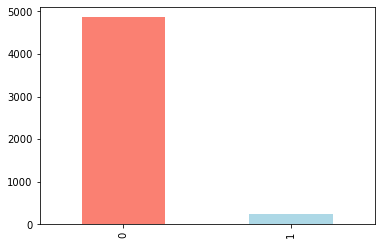

In [7]:
# Plot the difference

df.stroke.value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

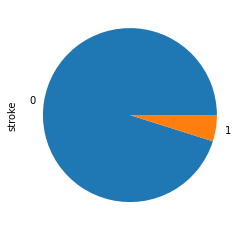

In [8]:
df.stroke.value_counts().plot(kind='pie');

Massive difference beetwen classes, we'll figure out what to do about it later.

For now continuing with EDA.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
# In `info()` I see some missing values, now confirming it

df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Not a lot of missing values, and bmi should be easy fixable with medium() or mean()

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
# Removing ID column, we don't need it to predict stroke, and Pandas generated IDs for every patient

df_changed = df.drop('id', axis=1)

df_changed.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Comparing different columns with main column (stroke)

In [13]:
# First comparing gender and stroke

pd.crosstab(df_changed.gender, df_changed.stroke)

stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


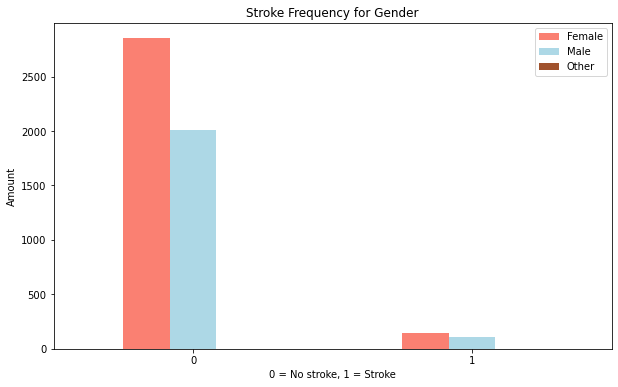

In [14]:
# Ploting comparison

pd.crosstab(df_changed.stroke, df_changed.gender).plot(kind='bar', color=['salmon', 'lightblue', 'sienna'], figsize=(10, 6))

plt.title('Stroke Frequency for Gender')
plt.xlabel('0 = No stroke, 1 = Stroke')
plt.ylabel('Amount')
plt.legend(['Female', 'Male', 'Other'])
plt.xticks(rotation=0);

plt.savefig('stroke_frequency_for_gender.png')

In [15]:
# More comparison

pd.crosstab(df_changed.heart_disease, df_changed.stroke)

stroke,0,1
heart_disease,,
0,4632,202
1,229,47


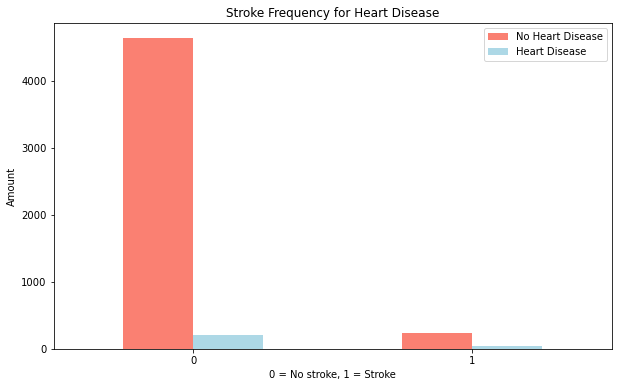

In [16]:
# PLoting it

pd.crosstab(df_changed.heart_disease, df_changed.stroke).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])

plt.title('Stroke Frequency for Heart Disease')
plt.xlabel('0 = No stroke, 1 = Stroke')
plt.ylabel('Amount')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0);

plt.savefig('stroke_frequency_for_heart_disease.png')

**Conclusion**: Having heart disease does NOT mean patient will get stroke.

### Creating a scatter plot for 2 different columns

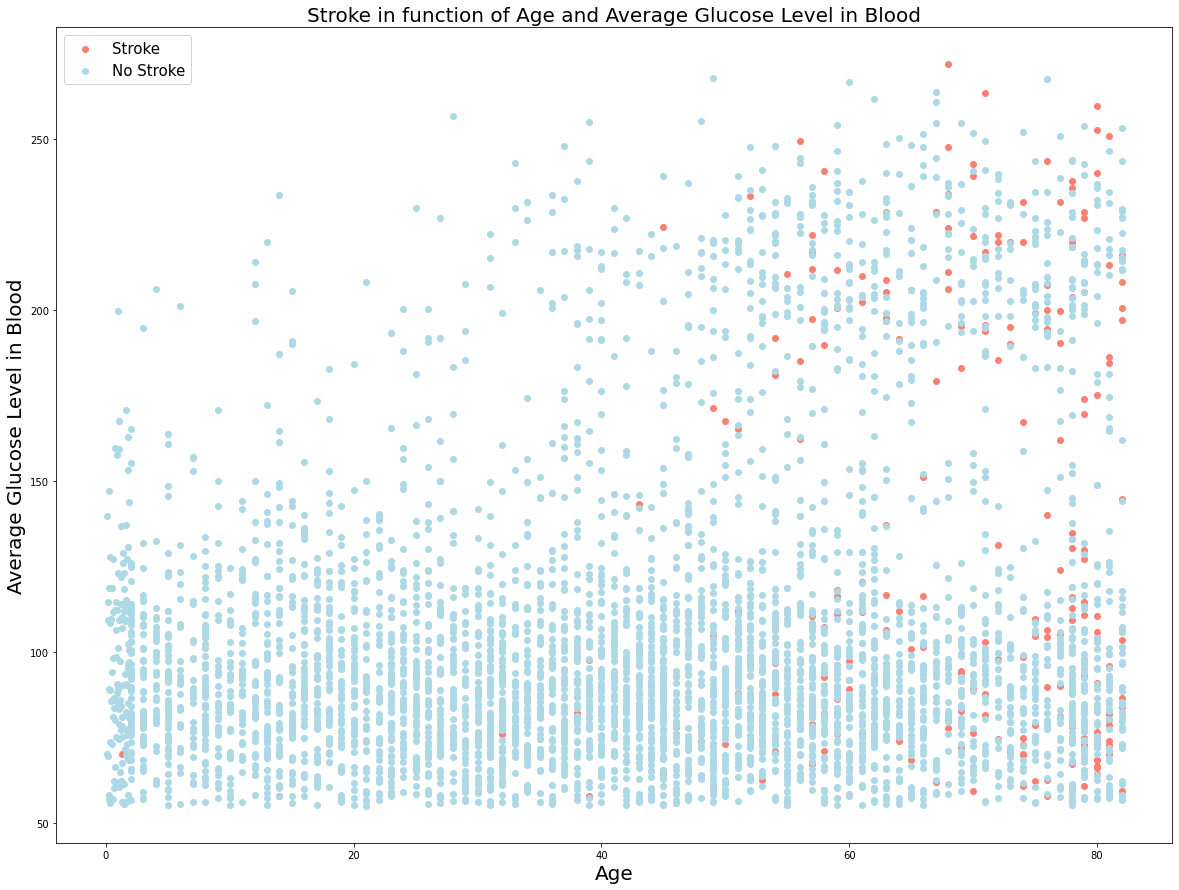

In [17]:
# Create figure

plt.figure(figsize=(20, 15))

# Scatter with positive examples

plt.scatter(df_changed.age[df_changed.stroke == 1],
            df_changed.avg_glucose_level[df_changed.stroke == 1],
            c='salmon')

# Scatter with negative examples

plt.scatter(df_changed.age[df_changed.stroke == 0],
            df_changed.avg_glucose_level[df_changed.stroke == 0],
            c='lightblue')

# Add some helpful info

fontdict = {'fontsize': 20}

plt.title('Stroke in function of Age and Average Glucose Level in Blood', fontdict=fontdict)
plt.xlabel('Age', fontdict=fontdict)
plt.ylabel('Average Glucose Level in Blood', fontdict=fontdict)
plt.legend(['Stroke', 'No Stroke'], fontsize=15);

plt.savefig('stroke_age_and_average_glucose_level_in_blood.png')

### Next on the list is correlation matrix to see what column influence our target(stroke) the most

But first we need to fill out the missing values inside the DataFrame

In [18]:
# Check out which values are missing

df_changed.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
# Only `bmi` is missing which is not a problem to fill, we can use a medium or mean of existing values to fill all the missing values

df_changed.fillna(df_changed.bmi.mean(), inplace=True)

df_changed = df_changed.round(decimals=2)

df_changed.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.00,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.80,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.89,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.20,Unknown,1


After filling out bmi column we can make a correlation matrix and visualize it

In [20]:
# Correlation matrix

df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


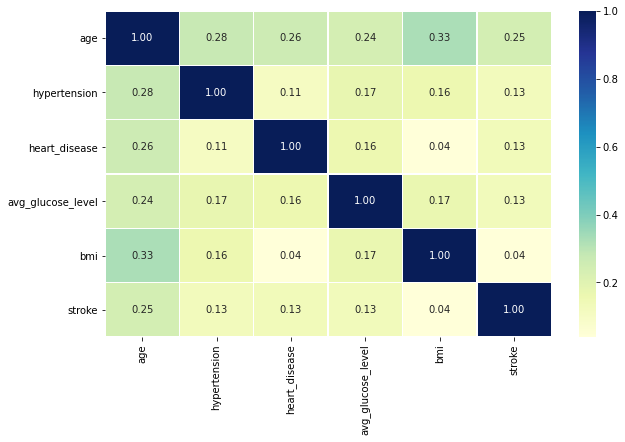

In [21]:
# Visualizing correlation matrix

corr_matrix = df_changed.corr()

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu');


plt.savefig('corr_matrix_stroke_columns.png')

According to this matrix, age influences the most on whether the patient will have a stroke or not

### Before Modeling

Before we start modeling our project, we have to convert our columns to numbers

In [22]:
# Creating a simple function to convert all columns to categories

for label, content in df_changed.items():
    if pd.api.types.is_string_dtype(content):
        df_changed[label] = df_changed[label].astype('category').cat.as_ordered()
        
df_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 265.4 KB


In [23]:
# Now we can access numeric values with cat.codes() method

df_changed.gender.cat.codes

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Length: 5110, dtype: int8

In [24]:
# Now to change categories into codes (numeric values)

for label, content in df_changed.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_changed[label] = pd.Categorical(content).codes + 1

## 5. Modeling

Finally we are the modeling part of this project, time to find the perfect model for our project.

We'll use 3 different ones:

1. RandomForestClassifier
2. KNearestNeighbour
3. Logistic Regression

### First to split our data into X, y and to make train and test splits

In [25]:
# Spliting into X and y

X = df_changed.drop('stroke', axis=1)

y = df_changed.stroke

In [26]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,2,67.0,0,1,2,3,2,228.69,36.60,2
1,1,61.0,0,0,2,4,1,202.21,28.89,3
2,2,80.0,0,1,2,3,1,105.92,32.50,3
3,1,49.0,0,0,2,3,2,171.23,34.40,4
4,1,79.0,1,0,2,4,1,174.12,24.00,3


In [27]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [28]:
# Split data into train and test sets

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
pd.api.types.is_string_dtype(df_changed.gender)

False

In [49]:
# Let's put our models into dictionary to later create a function to fit and score models

model = {'Logistic Regression': LogisticRegression(solver='liblinear'),
         'KNN': KNeighborsClassifier(),
         'RandomForest': RandomForestClassifier()}

In [31]:
# Create a function to fit and score model

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different Scikit-Learn machine learning models
    X_train: Training data (no labels)
    X_test: Testing data (no labels)
    y_train: Training data (labels)
    y_test: Testing data (labels)
    """
    
    # Set random seed
    np.random.seed(42)
    
    # Make an empty dictionary for scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [32]:
scores = fit_and_score(model, X_train, X_test, y_train, y_test)

scores

{'Logistic Regression': 0.9393346379647749,
 'KNN': 0.9344422700587084,
 'RandomFores': 0.9383561643835616}

Models are very accurate, but we are looking for f1_score.

Let's use cross_validation to calculate f1_score on our models. Using RandomForest first

In [33]:
crf = RandomForestClassifier()

cv_f1 = cross_val_score(crf, X, y, cv=5, scoring='f1').mean()

cv_f1

0.0

In [34]:
cv_acc = cross_val_score(crf, X, y, cv=5, scoring = 'accuracy').mean()

cv_acc

0.94853228962818

In [35]:
df_changed.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### Problem

There is a massive problem with this dataset.

Big difference in classes, many many more cases with no stroke, so it happens for our model to randomly predict whether there is or no stroke. Which is why it's super accurate, but our f1_score, which considers class imbalance is so low. Now it's time to find a way around it.

## Up-Sample Minority Class

First let's try giving more samples to the positive class of dataset.

In [36]:
from sklearn.utils import resample

In [38]:
# Separate majority and minority classes

df_changed_minority = df_changed[df_changed.stroke == 1]
df_changed_majority = df_changed[df_changed.stroke == 0]

In [40]:
df_changed_minority.stroke.value_counts()

1    249
Name: stroke, dtype: int64

In [42]:
# Up-Sample minority class

df_minority_upsampled = resample(df_changed_minority,
                                 replace=True,
                                 n_samples=4861,
                                 random_state=42)

In [44]:
df_minority_upsampled.stroke.value_counts()

1    4861
Name: stroke, dtype: int64

In [45]:
# Combine the majority class with new upsampled minority class

df_changed_upsampled = pd.concat([df_changed_majority, df_minority_upsampled])

# Display the combined DataFrame value counts

df_changed_upsampled.stroke.value_counts()

0    4861
1    4861
Name: stroke, dtype: int64

## It's time to do the modeling again

In [50]:
# Making train and test splits

np.random.seed(42)

X = df_changed_upsampled.drop('stroke', axis=1)
y = df_changed_upsampled.stroke


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Using the previous function for fitting model

upsampled_scores = fit_and_score(model, X_train, X_test, y_train, y_test)

In [51]:
upsampled_scores

{'Logistic Regression': 0.7922879177377892,
 'KNN': 0.9280205655526992,
 'RandomForest': 0.9922879177377892}

Random Forest doing much much better than expected, can this be because of overfitting ? Let's try with f1_score now.

In [54]:
crf_upsampled = RandomForestClassifier()

cv_f1  = cross_val_score(crf_upsampled, X, y, scoring='f1', cv=5).mean()

In [55]:
cv_f1

0.9914351140028265

The score is almost 1, which is too good to be true. There is a possibility upsampling overfitted the model, let's try another aproach which is down sampling majority class

## Down-Sample Majority Class

In [ ]:
# Since we already separated classes, there is no need to do it again, we'll start with downsampeling

df_changed_majority_downsampled = resample(df_changed_majority,
                                           replace=True,
                                           n_samples)